In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
phones=read_csv("C:/Users/shweta shetty/Documents/ml/like-unlike/like-unlike/dataset.csv")

In [17]:
phones

,PhoneId,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,...,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,NaN,4.5
1,1,NaN,Oppo Browser,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.5
2,2,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,yes,yes,v4.2,...,NaN,NaN,yes,NaN,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,NaN,4.4
3,4,NaN,NaN,64 bit,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,NaN,4.3
4,5,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 60 fps,NaN,yes,NaN,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,NaN,4.4
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
6,7,Vivo V11 Pro,"Newspoint, Amazon, Amazon Prime Video, Phonepe...",64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,3840x2160 @ 30 fps,NaN,yes,NaN,156 grams Average ▾Weight compared to18 - 28 K...,"Wi-Fi 802.11, b/g/n/n 5GHz","Wi-Fi Direct, Mobile Hotspot",75 mm,NaN,4.5
7,8,NaN,NaN,64 bit,18:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,"1920x1080 @ 30 fps, 1280x720 @ 30 fps",NaN,yes,NaN,145 grams Good ▾Weight compared to5 - 7 K Phon...,"Wi-Fi 802.11, b/g/n","Wi-Fi Direct, Mobile Hotspot",71.5 mm,NaN,4.3
8,9,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,"1920x1080 @ 30 fps, 1280x720 @ 120 fps",NaN,yes,NaN,178 grams Below Average ▾Weight compared to8 -...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",71.6 mm,NaN,4.1
9,10,NaN,NaN,64 bit,19:9,NaN,3.5 mm,yes,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to7 - 11 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.3


In [18]:
phones.shape

(355, 99)

Dropping the rows that have less than 30 filled columns 

In [19]:
phones_new=phones.dropna(thresh=30)
phones_new.shape

(354, 99)

Dropping the columns that has more than 330 nulls. Since the dataset itself has 355 records, columns having more than 330 nulls are not significant.

In [20]:
phones_new=phones_new.drop(columns=phones_new.columns[phones_new.isnull().sum()>330])

Dropping Launch Date of a mobile phone considering that users like/dislike should be independent of the Launch Date of the phone.

In [21]:
phones_new=phones_new.drop(columns=["Launch Date"])

Converting data in the columns with non-numeric type to numeric by categorizing each data.

In [22]:
def handle_non_numeric_data(phones):
    columns=phones.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if phones[column].dtype!=np.int64 and phones[column].dtype!=np.float64:
            column_contents=phones[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
                    
            phones[column]=list(map(convert_to_int,phones[column]))
            
    return phones

In [23]:
phones=handle_non_numeric_data(phones_new)

Setting the Rating column to binary values having threshold as 3.5. 1 is like,0 is dislike

In [24]:
phones['Rating']=list(map(lambda x:1 if x>=3.5 else 0,phones['Rating']))

phones

,PhoneId,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,...,User Replaceable,Video Recording,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,0,2,3,0,3,6,1,4,27,...,1,5,1,0,186,10,2,108,0,1
1,1,24,2,3,0,3,6,1,5,25,...,1,5,1,0,269,9,1,57,0,1
2,2,0,2,1,0,3,13,1,5,25,...,1,0,1,0,158,9,1,7,0,1
3,4,0,2,6,4,3,3,1,4,19,...,1,5,1,0,146,13,2,126,0,1
4,5,0,2,1,0,3,6,1,5,42,...,1,1,1,0,129,13,1,39,0,1
6,7,8,2,1,0,3,6,1,4,4,...,1,15,1,0,157,7,2,25,0,1
7,8,0,2,7,0,3,6,1,5,27,...,1,18,1,0,221,9,2,112,0,1
8,9,0,2,3,0,3,6,1,5,27,...,1,11,1,0,132,10,2,53,0,1
9,10,0,2,3,0,3,13,1,5,17,...,1,5,1,0,59,9,1,57,0,1
10,12,0,2,9,0,3,11,1,4,8,...,1,8,1,7,217,0,2,95,0,1


In [25]:
phones.describe()

,PhoneId,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,...,User Replaceable,Video Recording,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,...,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,235.915254,1.723164,1.531073,2.855932,0.290960,2.816384,7.161017,0.435028,4.488701,24.166667,...,1.149718,5.813559,0.771186,1.457627,130.531073,7.155367,1.245763,66.757062,0.070621,0.926554
std,136.854314,5.675071,0.841821,2.936366,1.000044,0.623126,4.219146,0.496462,2.293268,12.733615,...,0.473265,5.304254,0.420664,3.694366,89.467359,3.397406,0.577232,41.834055,0.256554,0.261237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.250000,0.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,4.000000,17.000000,...,1.000000,1.250000,1.000000,0.000000,49.000000,5.000000,1.000000,25.250000,0.000000,1.000000
50%,235.000000,0.000000,2.000000,3.000000,0.000000,3.000000,6.000000,0.000000,5.000000,24.000000,...,1.000000,5.000000,1.000000,0.000000,128.500000,9.000000,1.000000,71.000000,0.000000,1.000000
75%,358.500000,0.000000,2.000000,6.000000,0.000000,3.000000,13.000000,1.000000,5.000000,31.000000,...,1.000000,5.000000,1.000000,0.000000,210.750000,9.000000,2.000000,106.750000,0.000000,1.000000
max,472.000000,29.000000,2.000000,9.000000,4.000000,3.000000,13.000000,1.000000,10.000000,47.000000,...,2.000000,18.000000,1.000000,17.000000,283.000000,13.000000,3.000000,133.000000,1.000000,1.000000


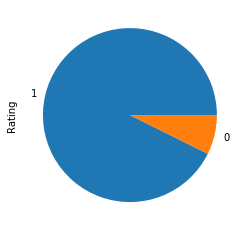

In [26]:
phones['Rating'].value_counts().plot(kind='pie')

In [27]:
#Checking for outlier fraction
Like=phones[phones.loc[:,'Rating']==1]
Dislike=phones[phones['Rating']==0]

outliers_frac=len(Dislike)/float(len(Like))
print(outliers_frac)

0.07926829268292683


In [28]:
print(len(Like))
print(len(Dislike))

328
26


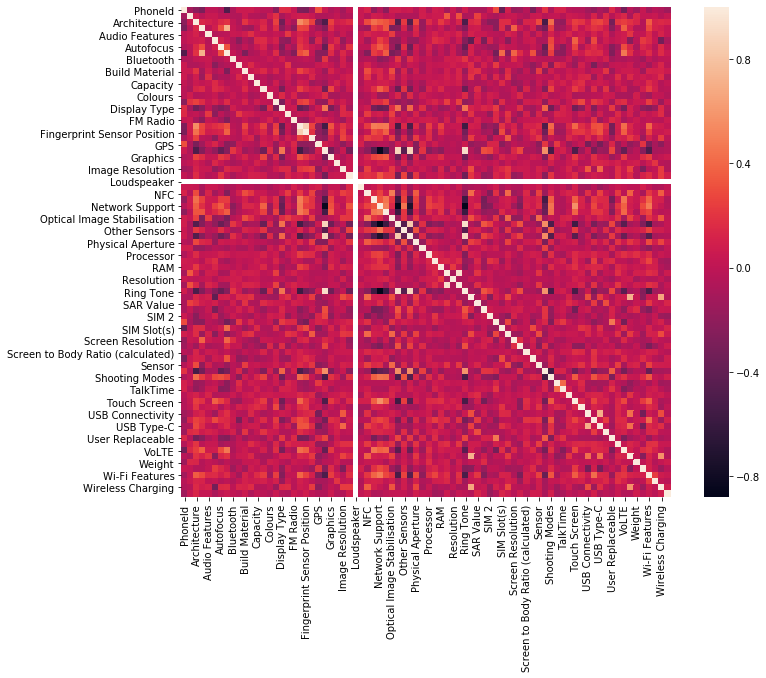

In [29]:
corrmat=phones.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=1,square=True)

In [30]:
columns=phones.columns.tolist()

columns=[c for c in columns if c not in ['Rating']]

target='Rating'

x=phones[columns]
y=phones[target]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "SVC": SVC(gamma=0.5,probability=True,C=0.5,kernel='rbf'),
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                        contamination=outliers_frac,
                                        random_state=state),
    "Random Forest Classifier": RandomForestClassifier(
        n_jobs=-1,
        n_estimators=100)}

In [34]:

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    
    clf.fit(xtrain,ytrain)
    ytest_pred=clf.predict(xtest)
    ytrain_pred=clf.predict(xtrain)
    
    # Reshape the prediction values to 1 for Like, 0 for Dislike. 
    ytest_pred[ytest_pred == 1] = 1
    ytest_pred[ytest_pred == -1] = 0
    ytrain_pred[ytrain_pred == 1] = 1
    ytrain_pred[ytrain_pred == -1] = 0
    
    n_errors = (ytest_pred != ytest).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print('Training accuracy:{}'.format(accuracy_score(ytrain, ytrain_pred)))
    print('Testing accuracy:{}'.format(accuracy_score(ytest, ytest_pred)))
    print(classification_report(ytest, ytest_pred))
    print(ytest_pred)
    print('Confusion Matrix:')
    print(confusion_matrix(y_pred=ytest_pred,y_true=ytest))

SVC: 3
Training accuracy:0.9187279151943463
Testing accuracy:0.9577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        68

    accuracy                           0.96        71
   macro avg       0.48      0.50      0.49        71
weighted avg       0.92      0.96      0.94        71

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion Matrix:
[[ 0  3]
 [ 0 68]]


C:\Users\shweta shetty\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shweta shetty\Miniconda3\envs\ml\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\shweta shetty\Miniconda3\envs\ml\lib\site-packages\sklearn\ensemble\iforest.py:274: UserWarning: max_samples (354) is greater than the total number of samples (283). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
C:\Users\shweta shetty\Miniconda3\envs\ml\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and w

Isolation Forest: 12
Training accuracy:0.8586572438162544
Testing accuracy:0.8309859154929577
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      0.87      0.91        68

    accuracy                           0.83        71
   macro avg       0.48      0.43      0.45        71
weighted avg       0.91      0.83      0.87        71

[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Confusion Matrix:
[[ 0  3]
 [ 9 59]]
Random Forest Classifier: 3
Training accuracy:1.0
Testing accuracy:0.9577464788732394
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        68

    accuracy                           0.96        71
   macro avg       0.48      0.50      0.49        71
weighted avg       0.92      0.96      

C:\Users\shweta shetty\Miniconda3\envs\ml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Comparison between these 3 models

SVC and RandomForest produces almost similar results with minimal amount of misclassifications while IsolationForest produces more number of misclassification. Precision for classifying Dislikes are very bad because of less number of "Dislike" samples over "Like" samples.